In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import csv

import datetime
from datetime import date
import calendar


import numpy as np
from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
#from bokeh.sampledata.stocks import AAPL
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Line
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from bokeh.palettes import Category20


In [2]:
# numeros totales

#palabras promedio por mensaje por usuario
# palabras mas comunes del grupo por año
# palabras mas comunes por usuario




In [93]:
# abre csv exportado de whatsapp app

# with open('chat2.txt', 'r', encoding="utf8") as myfile:
#   data = myfile.read()
# sentences = data.split('\n')  
# len(sentences)

59725

In [94]:
#construye el dataframe

# df = pd.DataFrame()
# for i in range(1,len(sentences)-1):
#     date=None
#     usertext=None
#     user=None
#     text=None
#     try:
#         date = sentences[i].split('-',1)[0].strip()
#         usertext = sentences[i].split('-')[1].strip()
#         user = usertext.split(':',1)[0].strip()
#         text = usertext.split(':',1)[1].strip()
#     except IndexError: 
#         pass
    
    
    
#     serie = pd.Series([user, date, text], index=['user', 'date', 'text'])
#     df = df.append(serie, ignore_index=True)
# export_csv = df.to_csv (r'chats-data2')


In [96]:
import os 

path = 'csvfiles'
table_list = []

df = pd.read_csv('chats-data2') 

In [129]:
print(df.shape,' tamaño antes de dropear')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear')

(59723, 4)  tamaño antes de dropear
(56918, 4)  tamaño despues de dropear


In [266]:
#convierte la columna date a formato DateTime
df.date = pd.to_datetime(df.date,format='%d/%m/%y %H:%M', errors='coerce')

#crea nuevas columnas en base a datos de fecha
df['week'] = df.date.dt.week
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['weekdaynr'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['date3'] = df.date.dt.date
df['date4'] = df.date.dt.strftime('%m-%Y')
    
    
    


print(df.shape,' tamaño antes de dropear excepciones coerce / NaT values')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear expepciones coerce / NaT values')
df.sample(3)


(56914, 12)  tamaño antes de dropear excepciones coerce / NaT values
(56914, 12)  tamaño despues de dropear expepciones coerce / NaT values


,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,weekday,date4
58245,58245,2019-11-09 20:00:00,El mes que viene te bañamos en leche enano puto,Santi el alto,45,2019,11,5,20,2019-11-09,Sabado,11-2019
54882,54882,2019-06-12 17:51:00,Es solo eso nomas 💜,Lepo Cl,24,2019,6,2,17,2019-06-12,Miercoles,06-2019
35926,35926,2018-02-15 14:44:00,TOMACOOOOOO,Lepo Cl,7,2018,2,3,14,2018-02-15,Jueves,02-2018


In [133]:
weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
#df['weekday'] = weekDays[df['weekday']]

#df['weekday'] = df['weekday'].apply(lambda x: weekDays[df['weekday']])
df['weekday'] = df['weekdaynr'].apply(lambda x: weekDays[x])
df.sample(3)

,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,weekday
1359,1359,2016-04-01 19:35:00,Comilona,Lepo Cl,13,2016,4,4,19,2016-04-01,Viernes
59150,59150,2019-12-13 01:46:00,Cállate que te encantan grandes. Goloso,Santi el alto,50,2019,12,4,1,2019-12-13,Viernes
5212,5212,2016-07-28 14:39:00,Jajajq,Lepo Cl,30,2016,7,3,14,2016-07-28,Jueves


In [260]:
#print("%02d - %02d" % (df.date.dt.month, df.date.dt.year))

df['date4'] = (df.date.dt.month, df.date.dt.year) = *


ValueError: too many values to unpack (expected 2)

Cantidad de mensajes totales del grupo estudiados: 56914
Cantidad de mensajes promedio por dia: 45.67736757624398
top cinco dias mas activos date3
2016-10-19    312
2018-06-14    276
2016-10-31    274
2016-08-12    266
2016-08-05    244
Name: date, dtype: int64


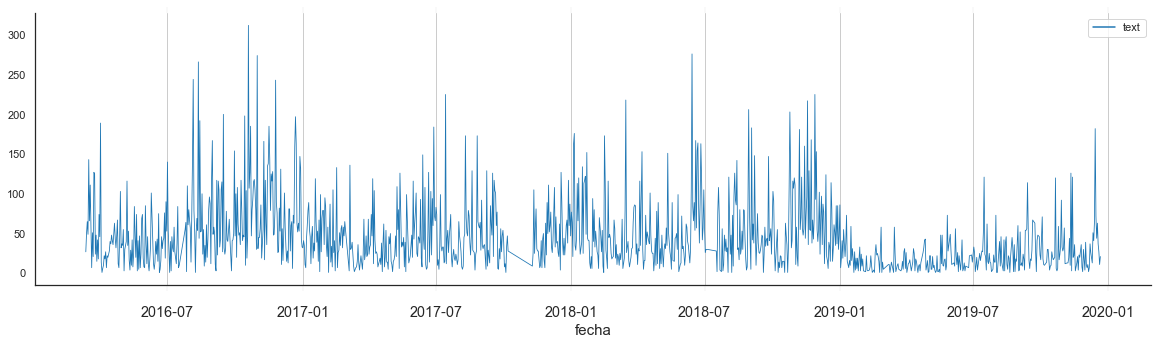

In [271]:
df_graph1 = df.groupby('date3').count()



a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
#sns.set()
sns.set(style="white")
#sns.set_context("poster")
plt.xlabel('fecha', fontsize=15)
x = df_graph1.index
y = df_graph1.text
#ax.set_xticklabels(['zero','two','four','six'])
#ax.set_xticks([df.year])
ax.tick_params(axis='x',pad=15,labelsize='large', reset=True, gridOn=True ,width=0.05)

#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
#ax.xaxis.set_ticks()

dates = df['date4']

data = df_graph1.text
datamean = data.rolling(5).mean()
sns.despine()

sns.lineplot(data=[data], palette="tab10", linewidth=0.8)#, title='historia del grupo!)
#sns.regplot(x=df_graph1,y= df_graph1.text,data=data, fit_reg=True) 
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print('Cantidad de mensajes promedio por dia:',df_graph1.date.mean())
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])



In [135]:
top_chat_day = df_graph1.date.sort_values(ascending=False).index[0]

print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(15)

15 mensajes random del dia mas activo del grupo: 2016-10-19


11363                                             Santiago
11452                                         Ahí le mande
11530                                                Ajaja
11430                                     5 truamatologos?
11288                                                    🤔
11433                                        Quiero flores
11436                                            Jajajajaj
11514    Hasta las 10.30 no voy a cenar así que caiga e...
11449                              Total me conoce ya fefe
11458                                 <Multimedia omitido>
11549                                          Jajajajajaj
11548                                                    😒
11323                             Se acuerdan de ese tema?
11443                                        Sini llamenlo
11393                                     1800 es saladito
Name: text, dtype: object

 #### graph 2 - actividad por horas por año

In [136]:
years_lists = df.year.unique()
df_graph2 = pd.DataFrame()

for i in years_lists:
    serie_graph2 = df.loc[df['year'] == i].groupby('hour').count().text.transpose()#.drop(index=i)
    df_graph2 = df_graph2.append(serie_graph2, ignore_index=True)
    
df_graph2.index = years_lists


tomando el comportamiento del último año
hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje -- 13 hs
hora del día con menor actividad para decir algo y pasar desapercibido -- 4 hs


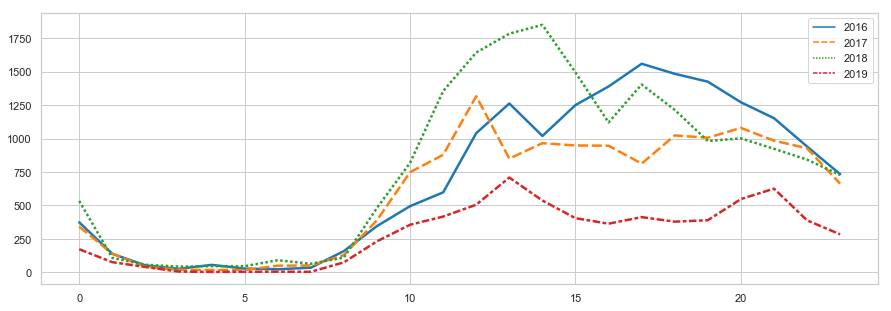

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

a4_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)



sns.set(style="whitegrid")
data = df_graph2.transpose()
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

ultimo_año_msg_x_hora = data[data.columns[-1]]
print('tomando el comportamiento del último año')
print('hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje --',ultimo_año_msg_x_hora.idxmax(),'hs') 
print('hora del día con menor actividad para decir algo y pasar desapercibido --',ultimo_año_msg_x_hora.idxmin(),'hs')

In [138]:
#preparing data 

df_graph3 = df[['year','user','text']].groupby(['year','user']).count()
df_graph3 = df_graph3.sort_values(by=['year','text'], ascending=[False,False])
df_grpah_unstacked = df_graph3.unstack().transpose()
df_grpah_unstacked.index = [i[1] for i in df_grpah_unstacked.index]
df_grpah_unstacked = df_grpah_unstacked.fillna(0)

dict1 = {'years' : df_grpah_unstacked.columns.values.tolist()}
indexlist = list( map(str, df_grpah_unstacked.index))
dict2 = dict(zip(indexlist,df_grpah_unstacked.values.tolist()))
dict1.update(dict2)


a = Category20[20]
b = Category20[20]

colorrr = a + b
users = [df_grpah_unstacked.index.values]
#colorrr[0:len(df_grpah_unstacked.index)]

In [272]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

output_file("stacked.html")

years = [df_grpah_unstacked.columns.values]
users = [df_grpah_unstacked.index.values]
colors = colorrr[0:len(df_grpah_unstacked.index)]

data = dict1


users = list( map(str, df_grpah_unstacked.index))


p = figure(plot_height=250, title="Mensajes por año",
           toolbar_location=None, tools="hover", tooltips="$name @$name")#, x_range=years)

p.vbar_stack(users, x='years', width=0.9, source=data, color=colors)#,legend=indexlist)

legend=indexlist

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [140]:
multimedia_msgs = df.loc[df['text'] == '<Multimedia omitido>'].groupby('user').count().sort_values('date', ascending=[False])
multimedia_msgs = multimedia_msgs.text

print('los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria')
multimedia_msgs[0:3]


los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria


user
Lepo Cl          1989
Joaquin           787
Santi Gancedo     758
Name: text, dtype: int64

In [89]:

from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum

output_file("pie.html")

x = {
    'United States': 157,
    'United Kingdom': 93,
    'Japan': 89,
    'China': 63,
    'Germany': 44,
    'India': 42,
    'Italy': 40,
    'Australia': 35,
    'Brazil': 32,
    'France': 31,
    'Taiwan': 31,
    'Spain': 29
}

colors = colorrr[0:len(multimedia_msgs.index)]

data = pd.Series(multimedia_msgs).reset_index(name='value').rename(columns={'index':'usuario'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colors
data = data.sort_values(by=['value'], ascending=[False])
p = figure(plot_height=350, title="Mensajes multimedia enviados", toolbar_location=None,
           tools="hover", tooltips="@user: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)


NameError: name 'multimedia_msgs' is not defined

In [90]:
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum

output_file("pie.html")

x = {
    'United States': 157,
    'United Kingdom': 93,
    'Japan': 89,
    'China': 63,
    'Germany': 44,
    'India': 42,
    'Italy': 40,
    'Australia': 35,
    'Brazil': 32,
    'France': 31,
    'Taiwan': 31,
    'Spain': 29
}

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field=data.country, source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

AttributeError: unexpected attribute 'legend_field' to Wedge, possible attributes are direction, end_angle, end_angle_units, fill_alpha, fill_color, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, name, radius, radius_units, start_angle, start_angle_units, subscribed_events, tags, x or y

In [91]:
import bokeh
bokeh.__version__ 

'1.3.4'